In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

# %config Completer.use_jedi = False

# 1. Read data

In [2]:
df = pd.read_csv('./tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


# 2. Normalize data

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
for i in df.columns.values:
    if df[i].dtype != 'object':
        print(i)
        mm = MinMaxScaler(feature_range=(0,1))
        df[i] = mm.fit_transform(df[[i]])
df.head()

TV
Sales


,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882


In [4]:
y = df['Sales']
x = df.drop(columns='Sales')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True)

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

# 4. Training

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = Net(len(df.columns.values) - 1, 1).to(device)
input_size = len(df.columns.values) - 1

optimizer = torch.optim.Adam(model.parameters())
citeration = nn.MSELoss()

num_epoch = 1000

for i in range(num_epoch):
    inputs = torch.tensor(x_train.values, dtype=torch.float32).to(device)
    tagets = torch.tensor(y_train.values, dtype=torch.float32).to(device)

    #forward pass
    outputs = model(inputs)
    # print(outputs.shape, tagets.shape)
    loss = citeration(outputs, tagets)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 5 == 0:
        print('epoch {}, loss: {}'.format(i + 1, loss.item()))

cpu
epoch 5, loss: 0.1086844950914383
epoch 10, loss: 0.10762281715869904
epoch 15, loss: 0.10657929629087448
epoch 20, loss: 0.10555464774370193
epoch 25, loss: 0.10454925149679184
epoch 30, loss: 0.10356315970420837
epoch 35, loss: 0.10259617865085602
epoch 40, loss: 0.10164793580770493
epoch 45, loss: 0.10071785748004913
epoch 50, loss: 0.09980536252260208
epoch 55, loss: 0.09890981018543243
epoch 60, loss: 0.09803050011396408
epoch 65, loss: 0.09716685861349106
epoch 70, loss: 0.09631823748350143
epoch 75, loss: 0.09548407047986984
epoch 80, loss: 0.0946638360619545
epoch 85, loss: 0.09385699033737183
epoch 90, loss: 0.09306313097476959
epoch 95, loss: 0.09228179603815079
epoch 100, loss: 0.09151258319616318
epoch 105, loss: 0.09075514227151871
epoch 110, loss: 0.09000911563634872
epoch 115, loss: 0.08927420526742935
epoch 120, loss: 0.08855012059211731
epoch 125, loss: 0.08783657848834991
epoch 130, loss: 0.08713331073522568
epoch 135, loss: 0.08644009381532669
epoch 140, loss: 0.

In [16]:
model.parameters()
for x in model.parameters():
    print(x)

Parameter containing:
tensor([[0.1281]], requires_grad=True)
Parameter containing:
tensor([0.4306], requires_grad=True)


loss:  0.0442337691783905


/home/truongdoan/anaconda3/envs/streamlit/lib/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


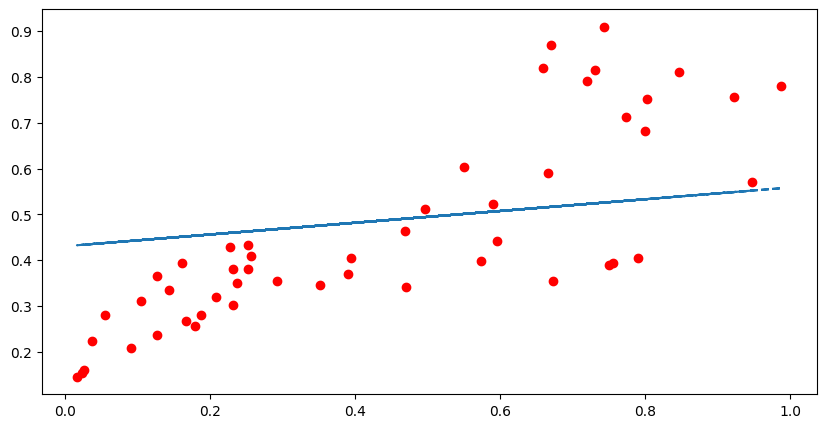

In [22]:
import matplotlib.pyplot as plt

with torch.no_grad():
    predicted = model(torch.tensor(x_test.values, dtype=torch.float32).to(device))
    tagets = y_test.values
    print('loss: ', citeration(predicted, torch.tensor(y_test.values, dtype=torch.float32).to(device)).item())

    plt.figure(figsize=(10, 5))
    plt.plot(x_test.values, tagets, 'ro', label='tagets')
    plt.plot(x_test.values, predicted.detach().cpu().numpy(), '--', label='predicted')
    